In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path

# Define datasets and metrics
datasets = ['real1_Abalone', 'real2_WineQuality', 'real3_CalHousing', 
           'real4_Concrete', 'real5_BreastTumor', 'real6_echoMonths', 
           'real7_Satellite', 'real8_Triazines']
metrics = ['rhat', 'test_mse', 'pi_length', 'coverage', 'train_time']

# Results directory
results_dir = Path('results')

def load_and_summarize_metric(metric):
    """Load all dataset results for a specific metric and summarize"""
    summary_data = []
    
    for dataset in datasets:
        file_path = results_dir / f"{dataset}_{metric}.csv"
        
        if file_path.exists():
            try:
                # Read CSV file
                df = pd.read_csv(file_path)
                
                # Calculate mean and standard deviation for each column
                summary_row = {}
                summary_row['Dataset'] = dataset
                
                for column in df.columns:
                    mean_val = df[column].mean()
                    std_val = df[column].std()
                    # Format as mean(std) 
                    summary_row[column] = f"{mean_val:.4f}({std_val:.4f})"
                
                summary_data.append(summary_row)
                
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
        else:
            print(f"File not found: {file_path}")
    
    return pd.DataFrame(summary_data)


Summary for RHAT
                  MultiBART_Rhat_Sigma2 DefaultBART_Rhat_Sigma2 MultiBART_Rhat_RMSE DefaultBART_Rhat_RMSE
Dataset                                                                                                  
real1_Abalone            1.2112(0.0859)          1.2189(0.0855)      1.5827(0.2856)        1.5276(0.3067)
real2_WineQuality        1.1227(0.0592)          1.1187(0.0663)      1.6854(0.3944)        1.5333(0.2972)
real3_CalHousing         1.8125(0.1398)          2.0143(0.2275)      1.8853(0.3402)        2.3092(0.3566)
real4_Concrete           1.7273(0.2786)          1.6153(0.2817)      1.7561(0.2497)        1.9599(0.3813)
real5_BreastTumor        1.0536(0.0444)          1.2071(0.1308)      2.1454(0.6511)        2.4591(0.4428)
real6_echoMonths         1.0803(0.0380)          1.0905(0.0544)      1.7309(0.4509)        1.8251(0.4150)
real7_Satellite          1.9624(0.2143)          1.7976(0.1313)      2.0057(0.3207)        1.9878(0.2652)
real8_Triazines          1.1

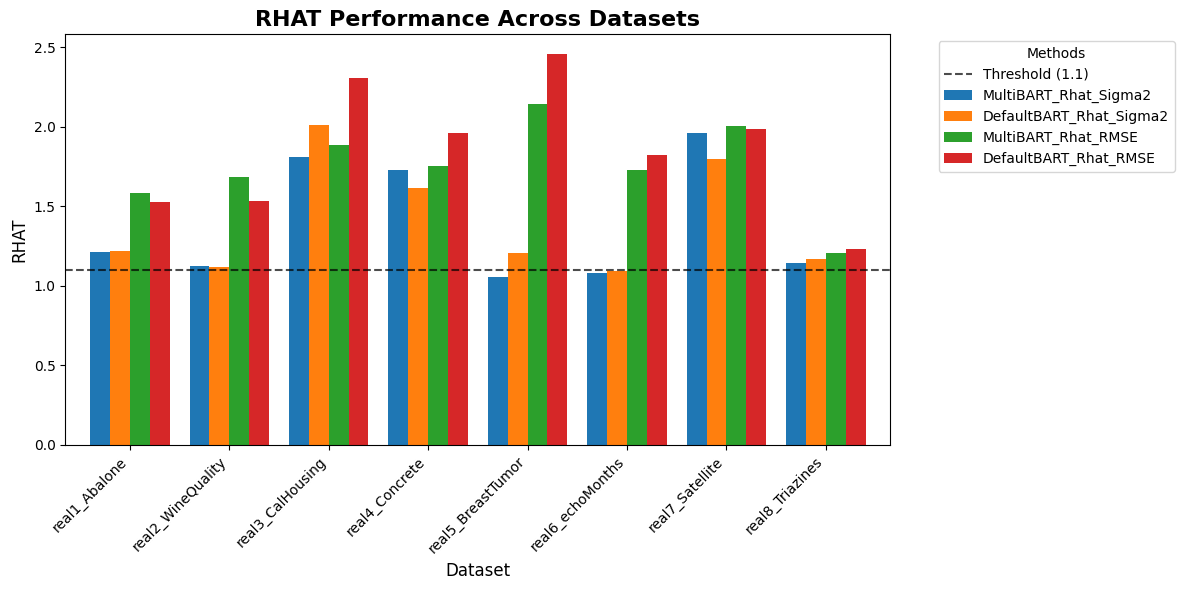


Summary for TEST_MSE
                          bart_mtmh              bart               btz                rf               xgb
Dataset                                                                                                    
real1_Abalone        5.2819(0.3672)    5.2326(0.3671)    5.1692(0.2829)    5.3432(0.2931)    4.9823(0.3018)
real2_WineQuality    0.4865(0.0256)    0.4911(0.0233)    0.5023(0.0213)    0.4113(0.0276)    0.4586(0.0190)
real3_CalHousing     0.2491(0.0073)    0.2748(0.0061)    0.3927(0.0187)    0.2901(0.0087)    0.2908(0.0074)
real4_Concrete      25.4619(3.1189)   28.5195(3.1029)   29.8991(2.6303)   29.2646(3.4378)   29.2018(3.0893)
real5_BreastTumor   88.4304(0.4906)   89.0038(0.5141)   89.0850(0.4023)  116.8421(0.8907)   90.1225(0.6102)
real6_echoMonths   131.1198(2.7076)  132.7597(3.1099)  133.9130(2.9171)  145.9948(2.6080)  132.8024(2.5937)
real7_Satellite      0.6882(0.0455)    0.6980(0.0424)    0.7622(0.0389)    0.5760(0.0332)    0.5791(0.0266)
real8_

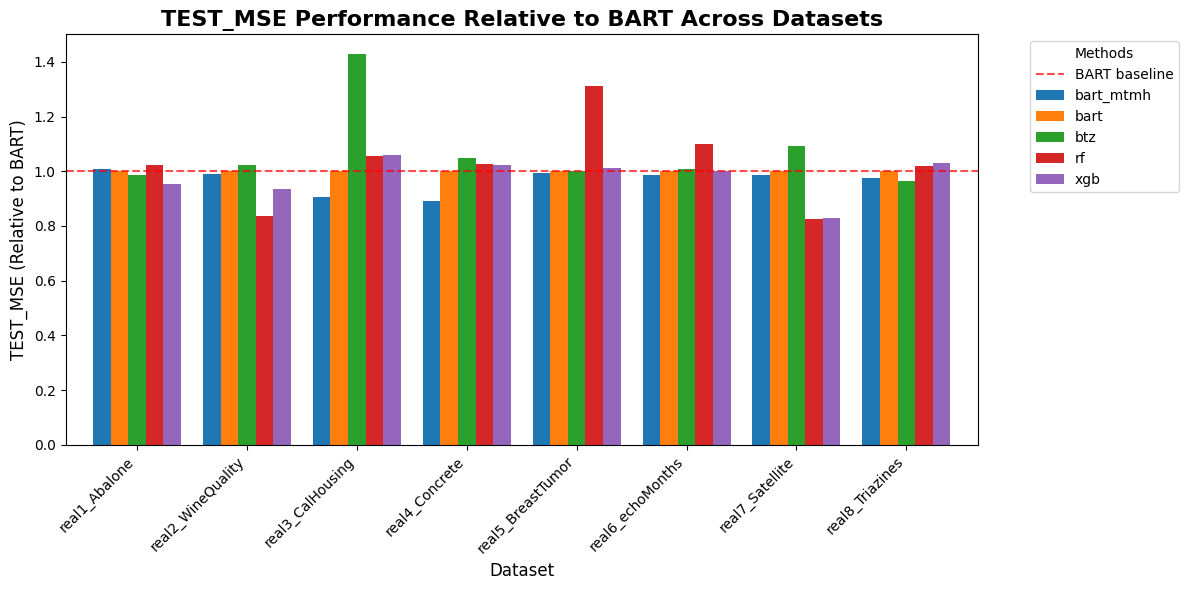


Summary for PI_LENGTH
                         bart_mtmh             bart              btz
Dataset                                                             
real1_Abalone       8.1301(0.1083)   8.2700(0.1363)   8.7001(0.1415)
real2_WineQuality   2.6165(0.0281)   2.6545(0.0249)   2.7773(0.0299)
real3_CalHousing    1.7608(0.0186)   1.9662(0.0220)   2.6024(0.0621)
real4_Concrete     16.7384(0.7216)  18.3519(0.9286)  23.2621(1.4099)
real5_BreastTumor  36.7031(0.0354)  36.8549(0.0420)  37.1928(0.0692)
real6_echoMonths   44.1569(0.1943)  44.6864(0.1306)  45.3964(0.1914)
real7_Satellite     2.3493(0.0544)   2.7407(0.0488)   3.5448(0.0930)
real8_Triazines     0.4464(0.0508)   0.4517(0.0429)   0.4961(0.0384)


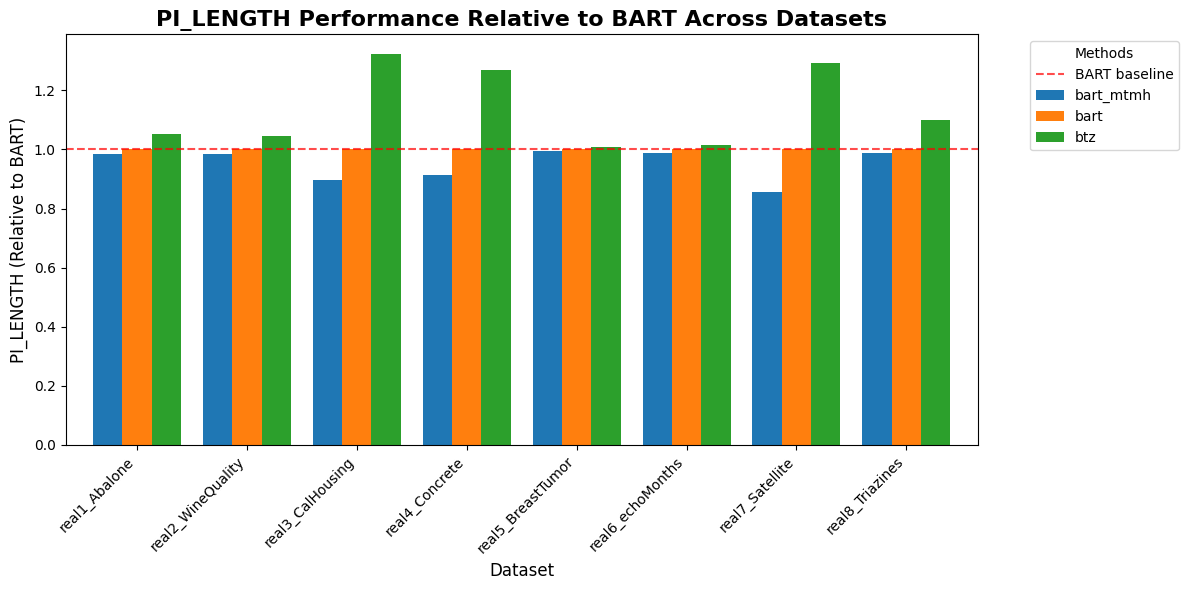


Summary for COVERAGE
                        bart_mtmh            bart             btz
Dataset                                                          
real1_Abalone      0.9266(0.0063)  0.9300(0.0093)  0.9387(0.0087)
real2_WineQuality  0.9366(0.0071)  0.9391(0.0060)  0.9439(0.0059)
real3_CalHousing   0.9317(0.0031)  0.9380(0.0033)  0.9493(0.0035)
real4_Concrete     0.9136(0.0144)  0.9140(0.0210)  0.9589(0.0135)
real5_BreastTumor  0.9371(0.0011)  0.9375(0.0008)  0.9399(0.0008)
real6_echoMonths   0.9386(0.0030)  0.9404(0.0039)  0.9443(0.0044)
real7_Satellite    0.8848(0.0082)  0.9023(0.0088)  0.9308(0.0058)
real8_Triazines    0.9362(0.0414)  0.9213(0.0414)  0.9362(0.0388)


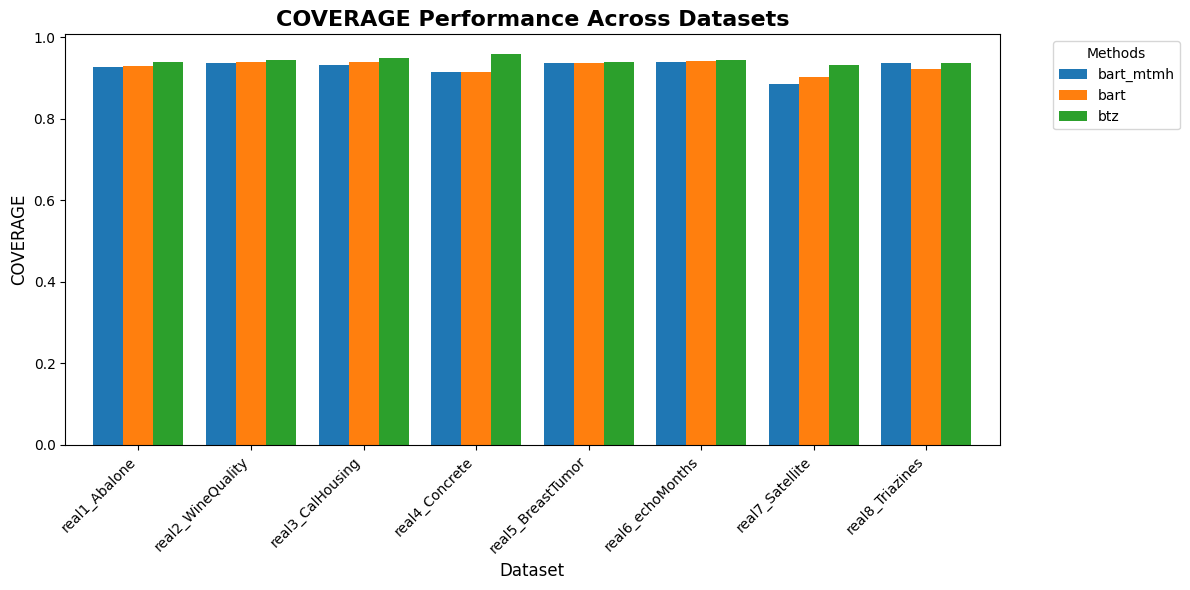


Summary for TRAIN_TIME
                          bart_mtmh             bart              btz              rf             xgb
Dataset                                                                                              
real1_Abalone       19.0991(1.0603)   3.1114(0.4449)  13.4641(0.9006)  0.2161(0.0121)  0.1376(0.0124)
real2_WineQuality   29.2583(1.8285)   3.6526(0.3344)  14.9973(2.4414)  0.4116(0.0071)  0.0838(0.0704)
real3_CalHousing   75.1428(22.4212)  16.5032(6.3266)  12.8955(1.7749)  1.3764(0.2335)  0.2434(0.0780)
real4_Concrete      12.1147(0.8352)   1.9857(0.3891)   9.7152(0.3820)  0.0536(0.0065)  0.1241(0.0076)
real5_BreastTumor  304.9711(6.4522)  65.2731(4.2554)  38.6862(1.3676)  5.1333(1.5136)  0.6986(0.3221)
real6_echoMonths    51.9845(1.6063)   7.8397(0.9230)  26.0424(0.7166)  1.5262(0.0318)  0.1603(0.0083)
real7_Satellite     34.9648(2.3721)   4.8279(0.5520)  16.2594(0.5014)  0.6898(0.0189)  0.1632(0.0077)
real8_Triazines      8.7691(0.2650)   1.9816(0.1160)  10.3

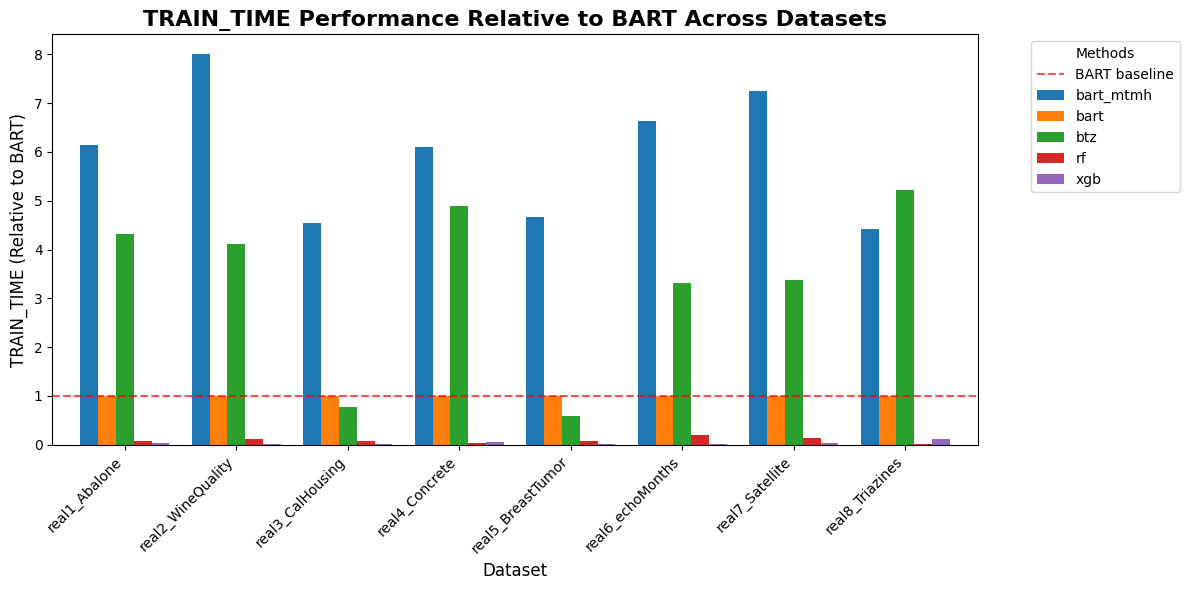

In [2]:
# Generate summary tables for each metric
import matplotlib.pyplot as plt
import seaborn as sns

for metric in metrics:
    print(f"\n{'='*50}")
    print(f"Summary for {metric.upper()}")
    print(f"{'='*50}")
    
    summary_df = load_and_summarize_metric(metric)
    
    if not summary_df.empty:
        # Set Dataset as index
        summary_df.set_index('Dataset', inplace=True)
        
        # Display table
        print(summary_df.to_string())
        
        # Create a numerical version for plotting
        plot_df = summary_df.copy()
        for col in plot_df.columns:
            # Extract mean values from "mean(std)" format
            plot_df[col] = plot_df[col].str.extract(r'(\d+\.?\d*)').astype(float)
        
        # Normalize data relative to BART performance (except for rhat and coverage)
        if metric not in ['rhat', 'coverage'] and 'bart' in plot_df.columns:
            for index in plot_df.index:
                bart_value = plot_df.loc[index, 'bart']
                if bart_value != 0:  # Avoid division by zero
                    plot_df.loc[index] = plot_df.loc[index] / bart_value
        
        # Create grouped bar chart
        fig, ax = plt.subplots(figsize=(12, 6))
        plot_df.plot(kind='bar', ax=ax, width=0.8)
        
        # Customize the plot
        if metric not in ['rhat', 'coverage']:
            ax.set_title(f'{metric.upper()} Performance Relative to BART Across Datasets', fontsize=16, fontweight='bold')
            ax.set_ylabel(f'{metric.upper()} (Relative to BART)', fontsize=12)
            # Add horizontal line at y=1 for reference
            ax.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='BART baseline')
        else:
            ax.set_title(f'{metric.upper()} Performance Across Datasets', fontsize=16, fontweight='bold')
            ax.set_ylabel(f'{metric.upper()}', fontsize=12)
            if metric == 'rhat':
                # Add horizontal line at y=1.1 for rhat
                ax.axhline(y=1.1, color='black', linestyle='--', alpha=0.7, label='Threshold (1.1)')

        
        ax.set_xlabel('Dataset', fontsize=12)
        ax.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')
        
        # Adjust layout to prevent clipping
        plt.tight_layout()
        plt.show()
        
    else:
        print(f"No data found for {metric}")

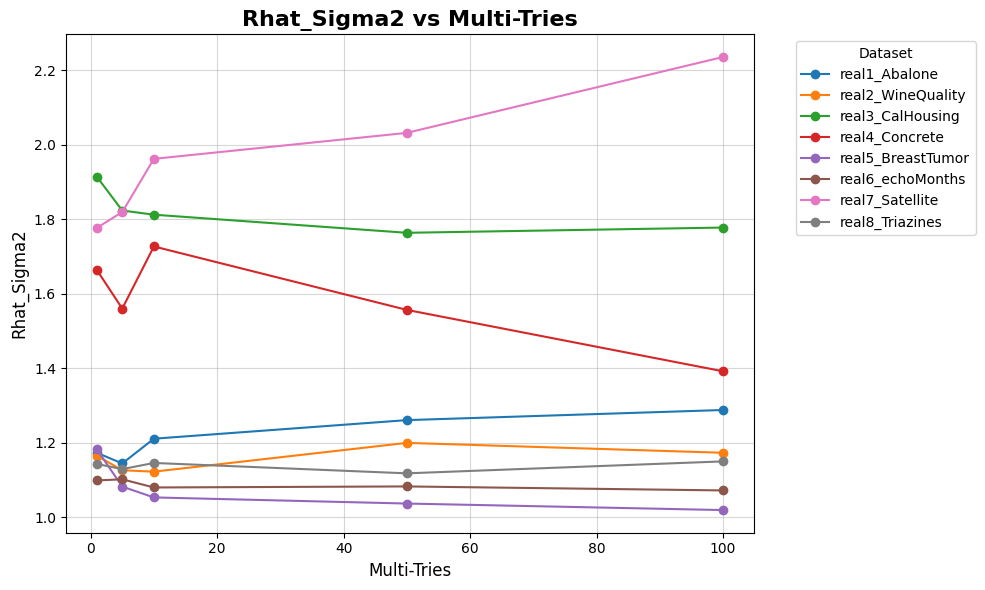

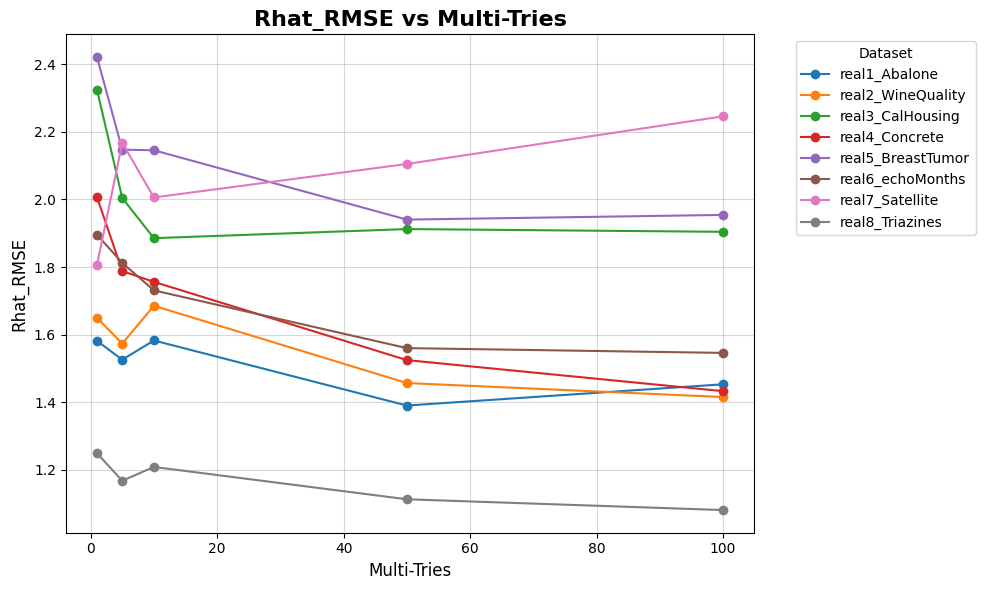

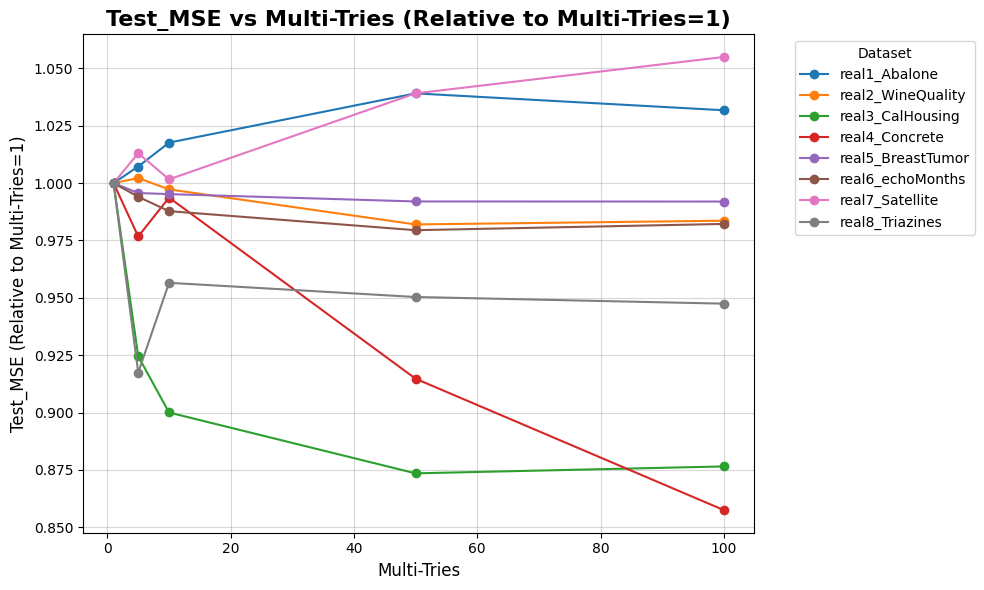

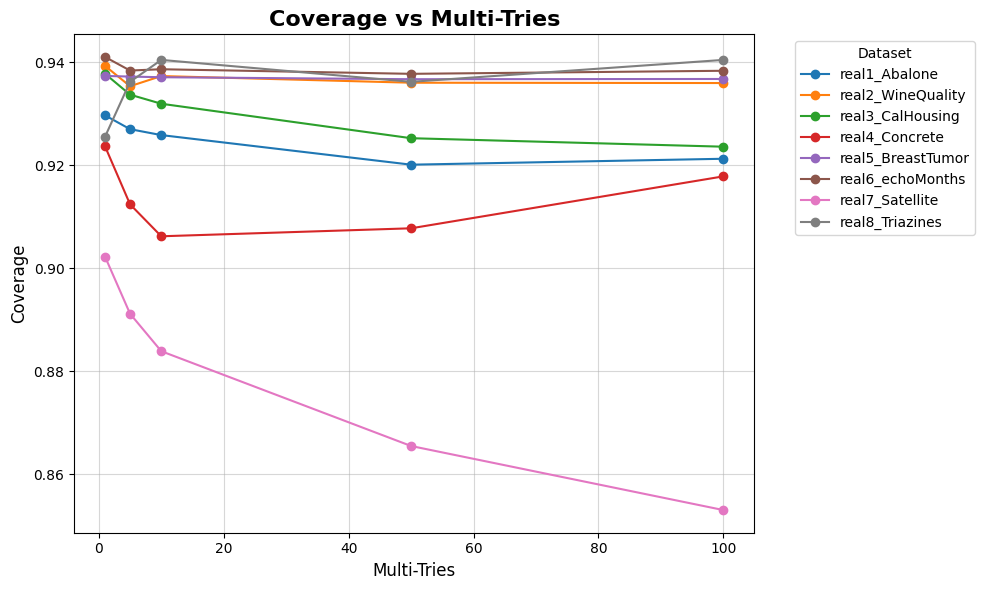

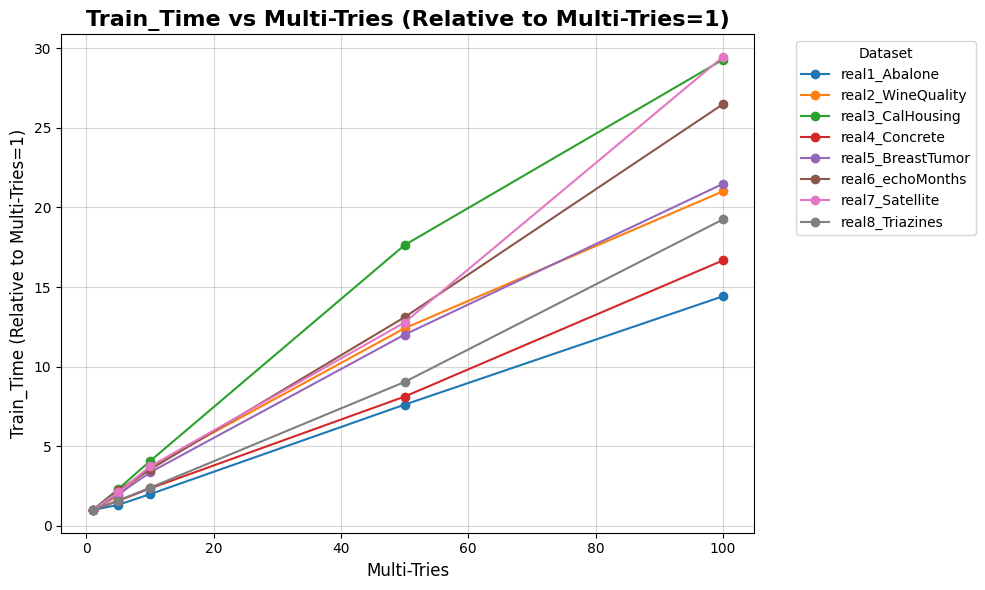

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Define datasets
datasets = ['real1_Abalone', 'real2_WineQuality', 'real3_CalHousing', 
           'real4_Concrete', 'real5_BreastTumor', 'real6_echoMonths', 
           'real7_Satellite', 'real8_Triazines']

# Results directory
results_dir = Path('results')

# Initialize a dictionary to store data for each metric
metric_data = {}

# Process each dataset's _tries.csv file
for dataset in datasets:
    file_path = results_dir / f"{dataset}_tries.csv"
    
    if file_path.exists():
        try:
            # Read the CSV file
            df = pd.read_csv(file_path)
            
            # Extract the column names (excluding the first column 'multi_tries')
            metrics = df.columns[1:]
            
            # Store the data for each metric
            for metric in metrics:
                if metric not in metric_data:
                    metric_data[metric] = []
                metric_data[metric].append((dataset, df['multi_tries'], df[metric]))
        
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    else:
        print(f"File not found: {file_path}")

# Plot each metric
for metric, data in metric_data.items():
    plt.figure(figsize=(10, 6))
    
    for dataset, multi_tries, values in data:
        # Normalize Test_MSE and Train_Time relative to their values at multi-tries=1
        if metric in ['Test_MSE', 'Train_Time']:
            values = values / values.iloc[0]
        
        plt.plot(multi_tries, values, marker='o', label=dataset)
    
    plt.xlabel('Multi-Tries', fontsize=12)
    if metric in ['Test_MSE', 'Train_Time']:
        plt.ylabel(f'{metric} (Relative to Multi-Tries=1)', fontsize=12)
        plt.title(f'{metric} vs Multi-Tries (Relative to Multi-Tries=1)', fontsize=16, fontweight='bold')
    else:
        plt.ylabel(metric, fontsize=12)
        plt.title(f'{metric} vs Multi-Tries', fontsize=16, fontweight='bold')
    plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()